# PART-B (1)

In [1]:
#Importing Libaray 
import numpy as nu
import pandas as ps
import sklearn as sl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data set
dframe = ps.read_csv("E:/Re-Assessment/MTHM017J_ref_def/Classification.csv")

In [3]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   X1          1000 non-null   float64
 2   X2          1000 non-null   float64
 3   Group       1000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [4]:
dframe.drop(columns=['Unnamed: 0'],inplace=True)

 (1) Summarise the two groups in terms of the variables X1 and X2, and for each group plot the distribution of both variables. Describe your findings.

In [5]:
#Summarizing X1 and X2 in terms of Group (0,1)
dframe.loc[dframe['Group'] == 1 ]

,X1,X2,Group
0,-1.007927,0.399027,1
1,-0.472480,0.839122,1
5,-0.395737,-0.120650,1
6,-0.155861,1.193433,1
9,0.453269,0.674206,1
...,...,...,...
993,-0.159649,-1.393399,1
994,-1.902844,-0.502929,1
996,-0.089104,-0.233336,1
998,0.579058,-0.452603,1


In [6]:
dframe.loc[dframe['Group'] == 0 ]

,X1,X2,Group
2,0.745229,-1.279742,0
3,-0.597908,-1.942436,0
4,0.186984,-1.541910,0
7,0.382044,-1.700433,0
8,0.684346,-0.890675,0
...,...,...,...
988,-0.836398,-0.772773,0
991,1.410255,0.279341,0
992,0.045212,-1.147023,0
995,2.257665,2.327370,0


In [7]:
dframe.describe()

,X1,X2,Group
count,1000.000000,1000.000000,1000.000000
mean,0.002033,0.016308,0.537000
std,0.989321,1.009761,0.498879
min,-3.055858,-3.414288,0.000000
25%,-0.679636,-0.625656,0.000000
50%,-0.038071,0.014719,1.000000
75%,0.649037,0.669465,1.000000
max,3.285469,3.943965,1.000000


Subdivision (2)

In [8]:
dframe['Group'] = dframe['Group'].astype('category')

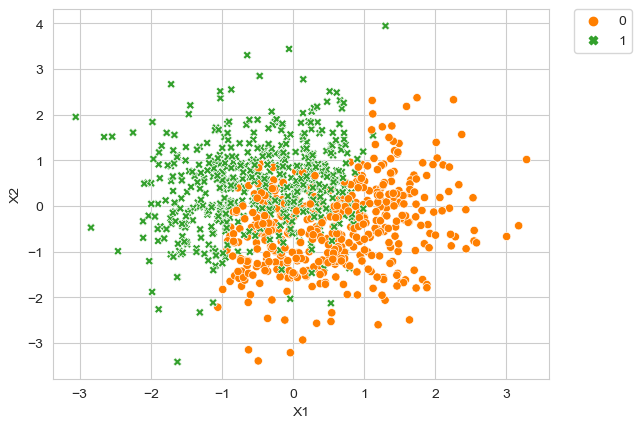

In [9]:
#Graph
import seaborn as sns
sns.set_style(style='whitegrid')
sns.scatterplot(
    data=dframe, 
    x='X1', 
    y='X2',
    hue='Group',
    style='Group',
    palette='Paired_r'
    )

plt.title('')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

We have two explanatory variables, X1 and X2, which we must divide into two groups, such as Group0 and Group1, according to the dataset summary. We have two groups, so it is obvious that we are interested in binary classification. It can be inferred from the plot of the data points that the two classes are not clearly separated and that the data may be normally distributed. Additionally, group 1 does have a wider distribution than group 0. 

Here, we use five classifiers, including the Support Vector Machine (SVM), Random Forest, K-Nearest Neighbors (KNN), and Linear Discriminant Analysis (LDA). SVM performs well for binary classification in these cases. The assumption that all classes should share variance is not met in the case of LDA, though. Additionally, I suppose that because the classes are not clearly separated, the linear decision boundary may not be effective in this situation. I've decided to use QDA, SVM, KNN, and Random Forest classifiers for my classification. The Confusion matrix can assess each classifier's performance. Accuracy, sensitivity, and specificity are just a few of the metrics that can be measured using a confusion matrix. The proportion of correctly predicted points to all data points is known as the accuracy. The number of accurate positive predictions divided by the total number of positives is how sensitivity is determined, and the number of accurate negative predictions divided by the total number of negatives is how specificity is determined. I have chosen accuracy in this case as the best metric to assess a classifier.

##  PART-B Subdivision (3)

In [10]:
#Seperating data set into x and y 
y_dframe = dframe[['Group']]
x_dframe = dframe[['X1', 'X2']]
type(y_dframe)
#Checing the balance of the dataset
dframe['Group'].value_counts()

1    537
0    463
Name: Group, dtype: int64

From the count we can confirm that the dataset is Imbalanced.hence we will use UpSampling and Downsampling to balance the dataset.
Upsampling and downsampling are the two main strategies used to address the class imbalance. Only the training set is subject to the sampling process; the validation and testing data are left unchanged.

what is an Imbalanced Dataset?.
The target classes' distribution of the training samples is not balanced. For instance, in our data set class 0 has less number of  record than class 1. Because of it ,   The model's predictive ability suffers as a result of being more biassed toward the class with a large number of training instances.In the case of a typical binary classification problem, it also causes a rise in Type II errors. 

Upsampling involves injecting artificially produced data points (corresponding to the minority class) into the dataset. The counts for both labels are nearly equal after this procedure. The model won't tend to favour the class with the majority of members thanks to this equalisation process. Additionally, the boundary line (interaction) between the target classes is unaltered. Additionally, because of the extra information, the upsampling mechanism introduces bias into the system.

The mechanism of downsampling lowers the number of training samples belonging to the majority class. Considering that it aids in balancing out target category counts. We frequently lose a lot of important information when we delete the collected data.

In [11]:
# Split test/train with setting the seed
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x_dframe, y_dframe,train_size=0.70, random_state = 100)

Spliting the dataset into train and test data in 70% and 30% ratio respectively. So that we can train the model and test it using this splited dataset.

In [12]:
#checking the shapes of the Train and Test Data
print(xTrain.shape,yTrain.shape,xTest.shape,yTest.shape)

(700, 2) (700, 1) (300, 2) (300, 1)


In [13]:
#Upsampling and DownSampling the yTrain as the data-set to remove the imbalaced
# Separate majority and minority classes
from sklearn.utils import resample
df_majority = yTrain[yTrain.Group==1]
df_minority = yTrain[yTrain.Group==0]
y_downsampled = resample(df_majority, replace=True, n_samples=350)
y_upsampled = resample(df_minority, replace=True,n_samples=350)
df_up_sampled = ps.concat([y_downsampled, y_upsampled])
df_up_sampled['Group'].value_counts()

0    350
1    350
Name: Group, dtype: int64

Because the data set is imbalanced, we have changed the measurement metrics from Accuracy to Precision, Recall, and F1 Score. But not even they are so remarkable. When working with imbalance data, AUC Curves and Average Precision are the methodologies to take into account. Plotting the AUC and ROC curves finally led to the identification of the best model. ((Hosgungor, 2022)

##  PART-B Subdivision (4)

In [14]:
#Importing more Libaray and Functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# KNN

Each observation in the KNN approach is categorized based on the nearby data points. A data point is categorized according to the majority votes of its neighbors. If a datapoint has 3 neighbors from class B and 5 neighbors from class A, it will be categorized as having the majority of Class A neighbors. However, choosing the number of neighbors to take into account when classifying the new data point is crucial. This number, which we designate as K, is extremely important for enhancing performance. The model may be too flexible and have low bias and high variance if this K is set too low; conversely, if it is set too high, the model may have low variance and high bias. Here, the KNN classifier has been implemented with K=6 chosen at random.

We import the KNN function from the sklearn and trained the base model with xTrain and yTrain dataset. Following this we use this trained model to predict response variable for given xTest data.

In [15]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(xTrain, yTrain)
yTestPred_knn = knn.predict(xTest)

# Repeat 10-fold cross-validation, five times, again we set the seed
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
Knn_model = GridSearchCV(estimator=KNeighborsClassifier(),param_grid={'n_neighbors': range(2, 15)}, cv=cv)
# Find optimal k (model)
# Fit the previously defined GridSearchCV to our taining dataset.
Knn_model.fit(xTrain, yTrain)
print(Knn_model.best_estimator_)

tPred_knn = Knn_model.predict(xTest) # evaluate performance on test data



KNeighborsClassifier(n_neighbors=9)


In [16]:
print(Knn_model.best_estimator_)
print("Metrics of KNN Before Tunning:")
print(classification_report(yTest, yTestPred_knn) ,"\n")

KNeighborsClassifier(n_neighbors=9)
Metrics of KNN Before Tunning:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       127
           1       0.87      0.82      0.84       173

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300
 



The accuracy of the KNN model with tunning is 82%. Now we will try to increase the accuracy of the KNN classification by tunning the model. We using the parameter K and choosing the optimal value for it. 
Now, by choosing the ideal K, we can increase the accuracy. To find the best K value we perform 10-fold cross validation where t he dataset has been divided into 10 equal parts, and data has been trained and tested for various k values(ranges given from 2 to 15), in order to select the accurate K.  We select the K value of model which provide highest accuracy.

We found the best estimator is k=9. 

What is GridSearchCV?
GridSearchCV is a library function included in the model selection package of sklearn. Fitting your estimator (model) to your training set will allow you iterate through specified hyperparameters. As a result, from the list of hyperparameters, you may choose the optimal parameters.

We gonna use GridSearchCV to hyper tune the model. And from this model we repeat all the steps except the repeated k-fold. 
here we have the param_grid range 2 to 15. From this the n_neighbors value changes between 2 to 15. the GridsearchCV have selected the n_neighbors value as 9. Again we check the metric of the tunned model to estimate the performerce of the tunned model. 

In [17]:
print("Metrics of KNN After Tunning:")
print(classification_report(yTest, tPred_knn))

Metrics of KNN After Tunning:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       127
           1       0.87      0.84      0.86       173

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



Now we will compare the base model performernce and tuned model performernce.
The classification report of tunned model shows accurcy of 84%. This is a significant increase in  accuracy of the model after Tunning the model
The performence of tuned model is better than base model. 
Hence we taking the Tuned model.

# SVM

We import the SVM function from the sklearn and train the  base model with xTrain and yTrain dataset. Following this we use this model to predict response variable for given xTest data.

The support vector machine is a generalisation of the Maximum marginal classifier and this can be mainly used for binary. According to the maximum marginal classifier we have to  find straight line caller the "optimal separating hyperplane" , which provides the greatest separation between the classes in the dataset.

However, it is challenging to locate a plane that accurately divides the classes. The points on the incorrect side are minima, so the objective is to locate the plane that offers the best separation. Each data point can be connected to a slack variable using a support vector classifier to achieve this. The value is assigned as 0 if the data point is on the right side of the hyperplane and the margin, and assigned between 0 and 1 if it is on the right side of the hyperplane and the wrong side of the margin. The value assigned will be greater than one if the data point is on the incorrect side of the hyperplane, however. A constant is created by adding up all the slack variables, and this constant can be used as a tuning parameter. While the support vector machine (SVM-Extended version of SVC) can be used for non-linear separation, the support vector classifier only works for linear separation lines.
In the SVM, optimization is carried out in two different ways: using the appropriate kernel and constants. Typically, SVM uses kernels of four different types: linear, polynomial, radial, and sigmoid. To achieve high accuracy, the effective kernel should be used. Here, the Constant C is initially set to 1, and the SVM is implemented using various kernels. 

In [18]:
from sklearn.svm import SVC

#Base Model
svm_model = SVC(probability=True, C=1.0)
svm_model.fit(xTrain,yTrain)
svm_pred = svm_model.predict(xTest)

#Tunning the Model
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
paramGrid =[{'kernel': ['rbf'], 'gamma':[1e-3,1e-4], 'C':[1,10,100,1000]},{'kernel':['poly'],'degree':[1,2,3], 'C': [1,10,100,1000]}]
svm_model1 = GridSearchCV(estimator=SVC(),param_grid=paramGrid, cv=cv)
# Fit the previously defined GridSearchCV to our taining dataset.
svm_model1.fit(xTrain, yTrain)
svm_pred1 =svm_model1.predict(xTest)

In [19]:
print(svm_model1.best_estimator_)
print("Metrics of SVM Before Tunning:")
print(classification_report(yTest, svm_pred) ,"\n")

SVC(C=1000, gamma=0.0001)
Metrics of SVM Before Tunning:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       127
           1       0.88      0.85      0.86       173

    accuracy                           0.85       300
   macro avg       0.84      0.85      0.84       300
weighted avg       0.85      0.85      0.85       300
 



The Accuracy of base model is 85 %. Now lets try to improve the performance of the model by tunning the model. We taking three parameters and give the value in it and passing the values through the Gridsearch and cross-validation.This choose the best parameter  from the given. We then build and train a model using the tunning parameters. 

In [20]:
print("Metrics of SVM After Tunning:")
print(classification_report(yTest, svm_pred1))

Metrics of SVM After Tunning:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       127
           1       0.83      0.83      0.83       173

    accuracy                           0.81       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.81      0.81      0.81       300



The tuned model's accuracy is 81%, which is less than the accuracy of the base model. which generally won't occur.

However, by incorporating the techniques known as upsampling and downsampling, we are able to balance the dataset and prevent it from being unbalanced.

To compare the models and choose the best one, we will take the ROC curve into account.

# Quadratic Discriminant Analysis

The Bayes theorem is used in both LDA and QDA classification. The probability of belonging to one class is typically measured directly in KNN-type classifiers, whereas LDA and QDA's probability measuring approach can be thought of as indirect. Here, the prior probability is taken into account and combined with likelihood to create the posterior probability. Major differnets between LDA and QDA is that the LDA work on assumption like,  Each class's explanatory variable distributions adhere to the Normal distribution and  the variance is shared among the classes (all classes have equally shared variances). Where as the Quadratic Discriminant Analysis (QDA) only adheres to the first assumption of LDA, so the distribution of classes may not be equal.

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 


model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(xTrain, yTrain) 
#Prediction
qda_pred = model_qda.predict(xTest)

print(classification_report(yTest, qda_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       127
           1       0.84      0.86      0.85       173

    accuracy                           0.83       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.83      0.83       300



We import the QDA function from the sklearn and train the  base model with xTrain and yTrain dataset. Following this we use this model to predict response variable for given xTest data.

Now we are checking the accuracy, f1 score and Recall of this model. We gonna consider f1 score and recall as the data set is imbalaced. 
We taking classfication report from that we check the precision value and recall and f1 score of predict of 0 and 1. 


The QDA method yields an accuracy rate of 83%.

# Comparing Models

{'SVM': 0.9322060898457057, 'KNN': 0.9051704519594009, 'QDA': 0.9050566656046607}


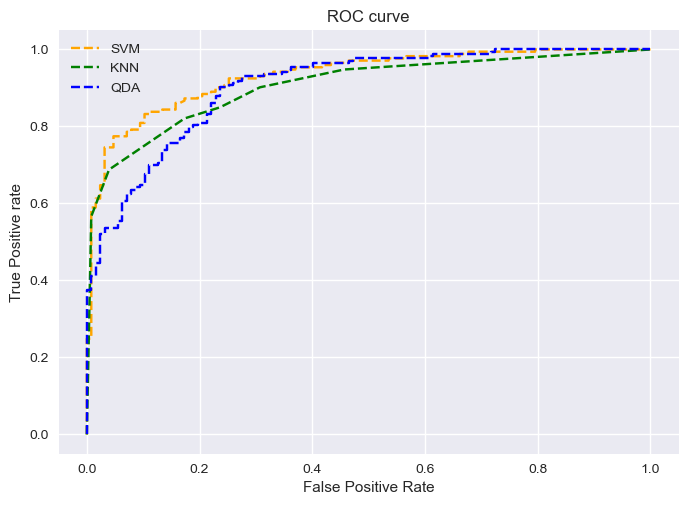

In [22]:
#prediction probabilities
svm_prob=svm_model.predict_proba(xTest)
knn_prob=knn.predict_proba(xTest)
qda_prob = model_qda.predict_proba(xTest)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(yTest, svm_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(yTest, knn_prob[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(yTest, qda_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(yTest))]
p_fpr, p_tpr, _ = roc_curve(yTest, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

#The roc auc score() function of sklearn may be used to calculate the AUC score
# auc scores
auc_score1 = roc_auc_score(yTest, svm_prob[:,1])
auc_score2 = roc_auc_score(yTest, knn_prob[:,1])
auc_score4 = roc_auc_score(yTest, qda_prob[:,1])
print({'SVM':auc_score1, "KNN" :auc_score2, "QDA":auc_score4})


# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='blue', label='QDA')
#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

What is the AUC-ROC curve?

A measurement tool for binary classification problems is the Receiver Operator Characteristic (ROC) curve espiecialy when the dataset is imbalanced. In essence, it separates the "signal" from the "noise" by plotting the TPR against the FPR at different threshold levels. The capacity of a classifier to differentiate between classes is measured by the Area Under the Curve (AUC), which is used as a summary of the ROC curve. (“AUC-ROC Curve in Machine Learning Clearly Explained - Analytics Vidhya”)

The performance of the model in differentiating between the positive and negative classes improves with increasing AUC.
When the AUC is 1, the classifier is able to accurately discriminate between every Positive and every Negative class point. The classifier is unable to discriminate between Positive and Negative class points when the AUC value is less than 0.5. (“AUC-ROC Curve in Machine Learning Clearly Explained - Analytics Vidhya”)

The extremely effective Sklearn function roc curve() quickly calculates the ROC for your classifier! The FPR, TPR, and threshold values are returned.


It is evident from the plot that the AUC for the SVM ROC Curve is higher than that for all other models. therefore we can say that SVM is best model for classifiying.

Works Cited


1) “AUC-ROC Curve in Machine Learning Clearly Explained - Analytics Vidhya.” Analytics Vidhya, https://www.facebook.com/AnalyticsVidhya/, 15 June 2020, https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/.

2) Hosgungor, E., 2022. How to Handle Imbalance Data and Small Training Sets in ML. [online] Medium. Available at: <https://towardsdatascience.com/how-to-handle-imbalance-data-and-small-training-sets-in-ml-989f8053531d> [Accessed 1 August 2022].